# KNN
## Mateusz Baran
### 155620

In [34]:
from sklearn.svm import SVC
import warnings
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [35]:
df = pd.read_csv('../data/Vlagun_Phys_Years3.csv')
df.head()

,PSU,O2,temp.,SS,DOC,TPOC,Windspeedinsitu,Depth,Years
0,3.757624,9.46,18.3,52.0,7.500,8.5650,3.5,3.3,0
1,3.504707,9.89,19.1,50.0,7.860,8.5200,0.0,3.6,0
2,3.757624,9.66,18.1,59.0,8.172,8.4915,1.0,3.4,0
3,3.107266,10.36,19.5,46.0,7.848,8.8320,0.0,2.9,0
4,2.619498,11.56,19.0,42.0,7.536,9.2400,0.0,3.0,0


In [36]:
x = df.iloc[:,[2,6]].values
y = df.iloc[:,-1].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 7)

In [38]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0 ].min() -1, stop =  X_set[:, 0 ].max() +1, step = 0.01),
                    np.arange(start = X_set[:, 1 ].min() -1, stop =  X_set[:, 1 ].max() +1, step = 0.01))

In [39]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [40]:
predict_train = model.predict(X_train)
print(f"Target on training set:\n {predict_train}")

Target on training set:
 [1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0
 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1
 0 0 1 1 0 1 0 0 0 0]


In [41]:
accuracy_train = accuracy_score(y_train, predict_train)
print(f"Accuracy score on training set:\n {accuracy_train}")

Accuracy score on training set:
 0.8452380952380952


In [42]:
predict_test = model.predict(X_test)
print(f"Target on test set:\n {predict_test}")
accuracy_test = accuracy_score(y_test, predict_test)
print(f"Accuracy score on test set:\n {accuracy_test}")

Target on test set:
 [1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1]
Accuracy score on test set:
 0.8333333333333334


/var/folders/jt/tty5vz7x055ff2wqz3c5z_mc0000gn/T/ipykernel_3156/3785146582.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],


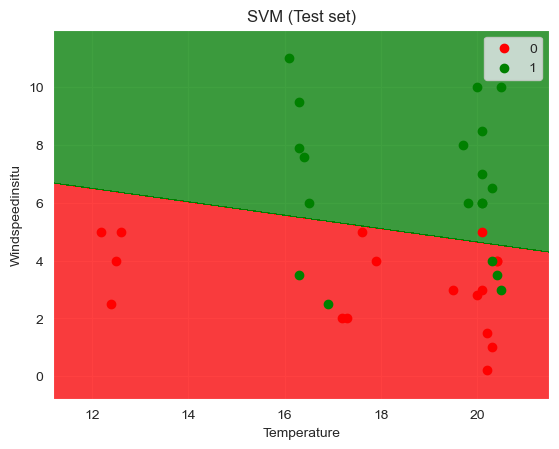

In [43]:
cmap = ListedColormap(['red', 'green'])

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot with numerical color values
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=cmap(i), label=j)

plt.title('SVM (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()

In [44]:
# radial

model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)
predict_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, predict_train)
print(f"Accuracy score on training set:\n {accuracy_train}")
predict_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, predict_test)
print(f"Accuracy score on test set:\n {accuracy_test}")

Accuracy score on training set:
 0.9047619047619048
Accuracy score on test set:
 0.8055555555555556


/var/folders/jt/tty5vz7x055ff2wqz3c5z_mc0000gn/T/ipykernel_3156/3785146582.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],


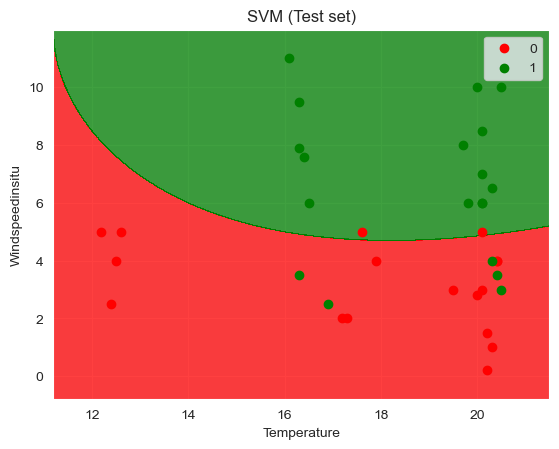

In [45]:
cmap = ListedColormap(['red', 'green'])

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot with numerical color values
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=cmap(i), label=j)

plt.title('SVM (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()

In [46]:
 # polynomial

model = SVC(kernel = 'poly')
model.fit(X_train, y_train)
predict_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, predict_train)
print(f"Accuracy score on training set:\n {accuracy_train}")
predict_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, predict_test)
print(f"Accuracy score on test set:\n {accuracy_test}")

Accuracy score on training set:
 0.8571428571428571
Accuracy score on test set:
 0.8333333333333334


/var/folders/jt/tty5vz7x055ff2wqz3c5z_mc0000gn/T/ipykernel_3156/3785146582.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],


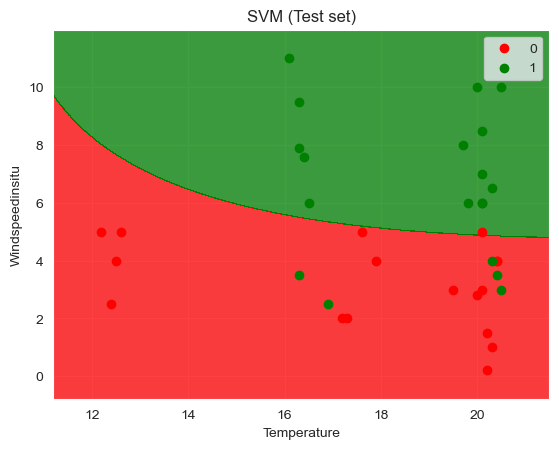

In [47]:
cmap = ListedColormap(['red', 'green'])

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot with numerical color values
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=cmap(i), label=j)

plt.title('SVM (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()

In [48]:
# sigmoid

model = SVC(kernel = 'sigmoid')
model.fit(X_train, y_train)
predict_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, predict_train)
print(f"Accuracy score on training set:\n {accuracy_train}")
predict_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, predict_test)
print(f"Accuracy score on test set:\n {accuracy_test}")

Accuracy score on training set:
 0.5595238095238095
Accuracy score on test set:
 0.4722222222222222


/var/folders/jt/tty5vz7x055ff2wqz3c5z_mc0000gn/T/ipykernel_3156/3785146582.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],


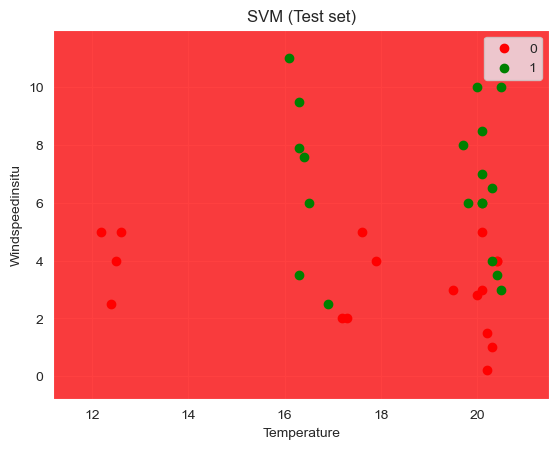

In [49]:
cmap = ListedColormap(['red', 'green'])

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot with numerical color values
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=cmap(i), label=j)

plt.title('SVM (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()